In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
from pathlib import Path
import functools
import itertools
from dataclasses import dataclass, fields

import pandas as pd
import numpy as np

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib import rcParams 

from matplottoy.data import fruit
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils


spath = Path("../../../draft/figures/code/")
rcParams['figure.dpi'] = 200

In [4]:
data = {'fruit': ['apple', 'orange', 'lemon', 'lime'], 
       'calories':[95, 67, 17, 20], 
       'juice':[True, True, False, False]}
df = pd.DataFrame(data)

In [5]:
data_bounds = {'calories':(17, 20), 'juice': [True], 'fruit':['orange']}
tau = fruit.DataFrameWrapper(df)

In [6]:
tau.query({'calories':(17,20)})

[{'fruit': array(['lemon', 'lime'], dtype=object),
  'calories': array([17, 20], dtype=int64),
  'juice': array([False, False]),
  'default': array([nan, nan])}]

In [7]:
# should K be up front or last?
def constant_color(c):
     return lambda x: [mcolors.to_rgba(c) for _ in x]

def constant_value(val):
     return lambda x: [val for _ in x]

In [8]:
constant_color('k')([1,2,3,4])
constant_value(1)([1,2,3,4])

[1, 1, 1, 1]

In [9]:
# multivariate nu, make key always a tuple ([possibly data class])
V = [('height', ('calories',), lambda x : x), 
     ('position', ('fruit',), 
          position.Nominal({'apple': 0, 'orange': 2, 'lemon': 4, 'lime': 6})),
     ('floor', (None,),  constant_value(0)), 
     ('width', (None), constant_value(.8)),
     ('edgecolor', ('juice',),
          color.Nominal({True: 'navy', False: 'purple'})),
     ('facecolor', ('fruit',), 
          color.Nominal({'apple': 'xkcd:red', 'orange': 'orange', 
          'lemon': 'gold', 'lime': 'lime'})
     ),
     ('linewidth', (None, ), constant_value(5)),
     ('linestyle', (None,), constant_value((0, None)))]

In [10]:
dbar = bar.Bar('v')
for (pi, fi, nui) in V:
  pbar = dbar.compose_with_nu(pi, fi, nui)

In [11]:
A = bar.TopologicalArtist(pbar).compose_with_tau(tau)

[(-1.0, 8.0), (0.0, 100.0)]

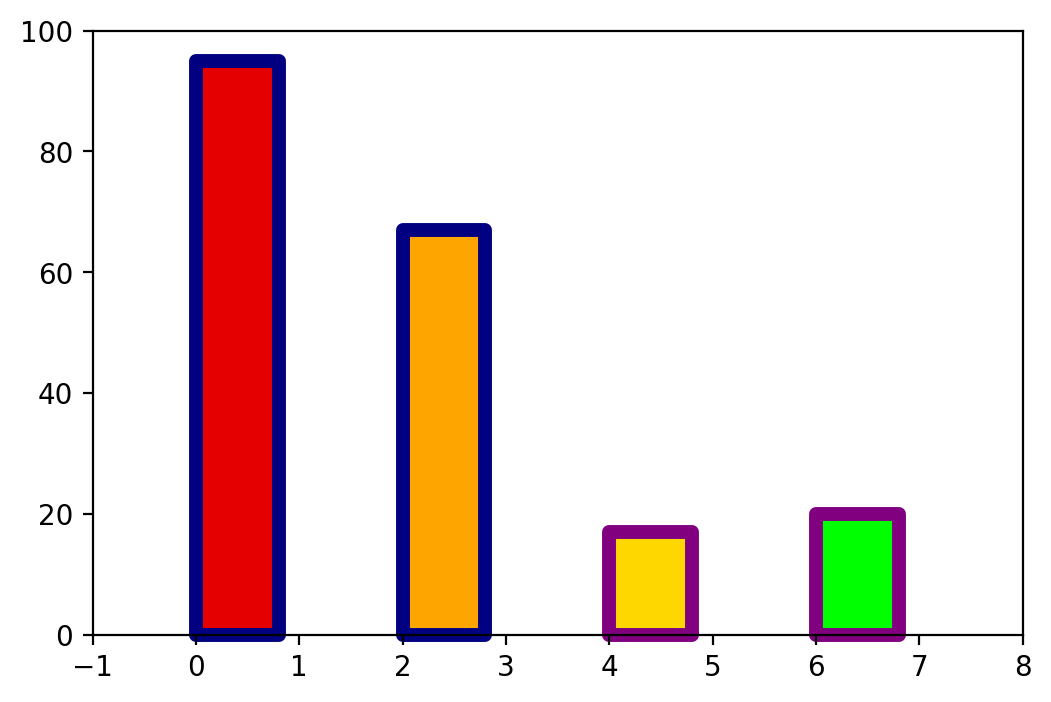

In [32]:
fig, ax = plt.subplots()
axesArtist = bar.GenericArtist(A)
ax.add_artist(axesArtist)
ax.set(xlim=(-1,8), ylim=(0, 100))

[(-1.0, 8.0), (0.0, 100.0)]

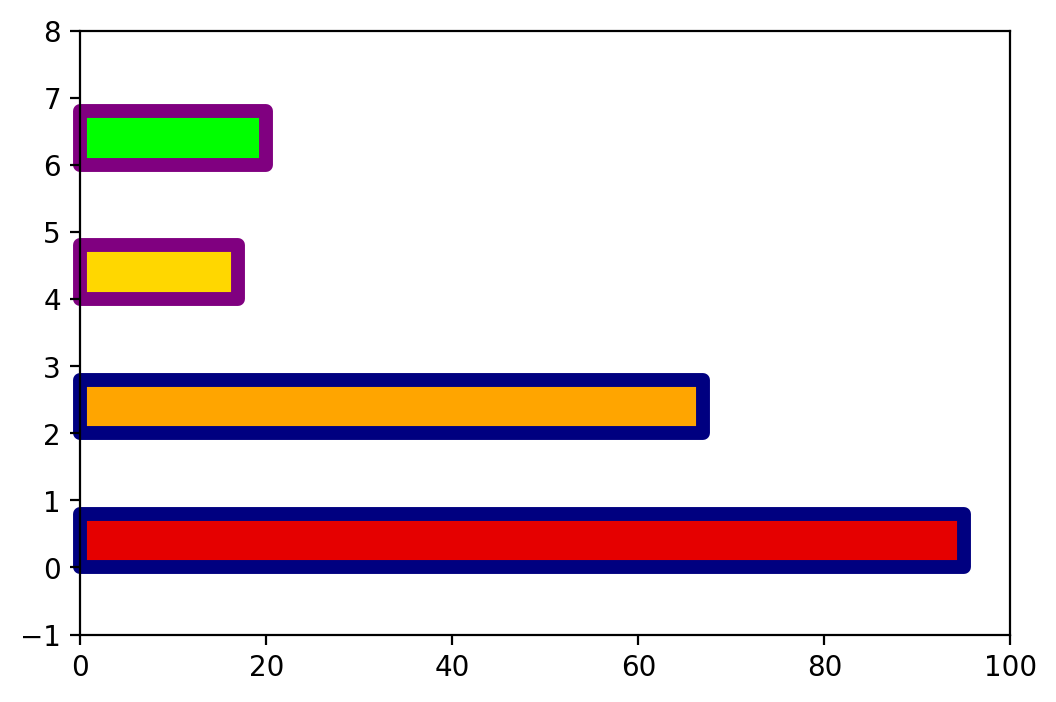

In [40]:
dbarh = bar.Bar('h')
for (pi, fi, nui) in V:
  pbarh = dbarh.compose_with_nu(pi, fi, nui)
Ah = bar.TopologicalArtist(pbarh).compose_with_tau(tau)
fig, ax = plt.subplots()
ax.add_artist(bar.GenericArtist(Ah))
ax.set(ylim=(-1,8), xlim=(0, 100))

In [36]:
Ah.graphic.V

{'linestyle': Mu(nu_i=<function constant_value.<locals>.<lambda> at 0x00000226E97BA820>, F_i=('default',)),
 'linewidth': Mu(nu_i=<function constant_value.<locals>.<lambda> at 0x00000226E97BA790>, F_i=('default',)),
 'floor': Mu(nu_i=<function constant_value.<locals>.<lambda> at 0x00000226E97BA670>, F_i=('default',)),
 'facecolor': Mu(nu_i=<matplottoy.encoders.color.Nominal object at 0x00000226E97E46A0>, F_i=('fruit',)),
 'edgecolor': Mu(nu_i=<matplottoy.encoders.color.Nominal object at 0x00000226E97E4610>, F_i=('juice',)),
 'height': Mu(nu_i=<function <lambda> at 0x00000226E97BA5E0>, F_i=('calories',)),
 'width': Mu(nu_i=<function constant_value.<locals>.<lambda> at 0x00000226E97BA700>, F_i=('default',)),
 'position': Mu(nu_i=<matplottoy.encoders.position.Nominal object at 0x00000226E97E4550>, F_i=('fruit',))}

In [124]:
axesArtist.get_screen_bounds_to_data_bounds(renderer)

(None, None)

In [127]:
A.data.query?

Signature:
A.data.query(
    data_bounds: Union[dict, NoneType] = None,
    sampling_rate: float = None,
) -> List[dict]
Docstring: <no docstring>
File:      c:\users\story\projects\proposal\code\matplottoy\data\fruit.py
Type:      method


In [154]:
A.graphic.mu(A.data.query()[0])

{'facecolor': [RGBA(r=0.8980392156862745, g=0.0, b=0.0, a=1.0),
  RGBA(r=1.0, g=0.6470588235294118, b=0.0, a=1.0),
  RGBA(r=1.0, g=0.8431372549019608, b=0.0, a=1.0),
  RGBA(r=0.0, g=1.0, b=0.0, a=1.0)],
 'yoff': [0, 0, 0, 0],
 'xoff': [0.8, 0.8, 0.8, 0.8],
 'y': array([95, 67, 17, 20], dtype=int64),
 'edgecolor': [RGBA(r=0.0, g=0.0, b=0.5019607843137255, a=1.0),
  RGBA(r=0.0, g=0.0, b=0.5019607843137255, a=1.0),
  RGBA(r=0.5019607843137255, g=0.0, b=0.5019607843137255, a=1.0),
  RGBA(r=0.5019607843137255, g=0.0, b=0.5019607843137255, a=1.0)],
 'linewidth': [5, 5, 5, 5],
 'linestyle': [(0, None), (0, None), (0, None), (0, None)],
 'x': array([0, 2, 4, 6])}